# Maskinlæring (med pingviner)

Vi skal lage en maskinlæringsmodell for å artsbestemme ringpingviner, bøylepingviner og adeliepingviner.

```{image} bilder/pingviner.png
:alt: pingviner
:class: bg-primary mb-1
:width: 300px
:align: center
```

```{image} bilder/pingvindata.png
:alt: pingviner
:class: bg-primary mb-1
:width: 300px
:align: center
```

## Datahåndtering med Pandas

In [22]:
import pandas as pd
import seaborn as sns

In [23]:
pingviner = pd.read_csv("datafiler/pengwings.txt")

In [29]:
pingviner.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [30]:
pingviner.tail()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE

In [31]:
pingviner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [34]:
pingviner["totalnebb"] = pingviner["bill_length_mm"] + pingviner["bill_depth_mm"]

In [36]:
pingviner.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

        totalnebb  
count  342.000000  
mean    61.073099  
std      5.351485  
min     47.600000  
25%     57.300000  
50%     60.350000  
75%     64.575000  
max     76.600000

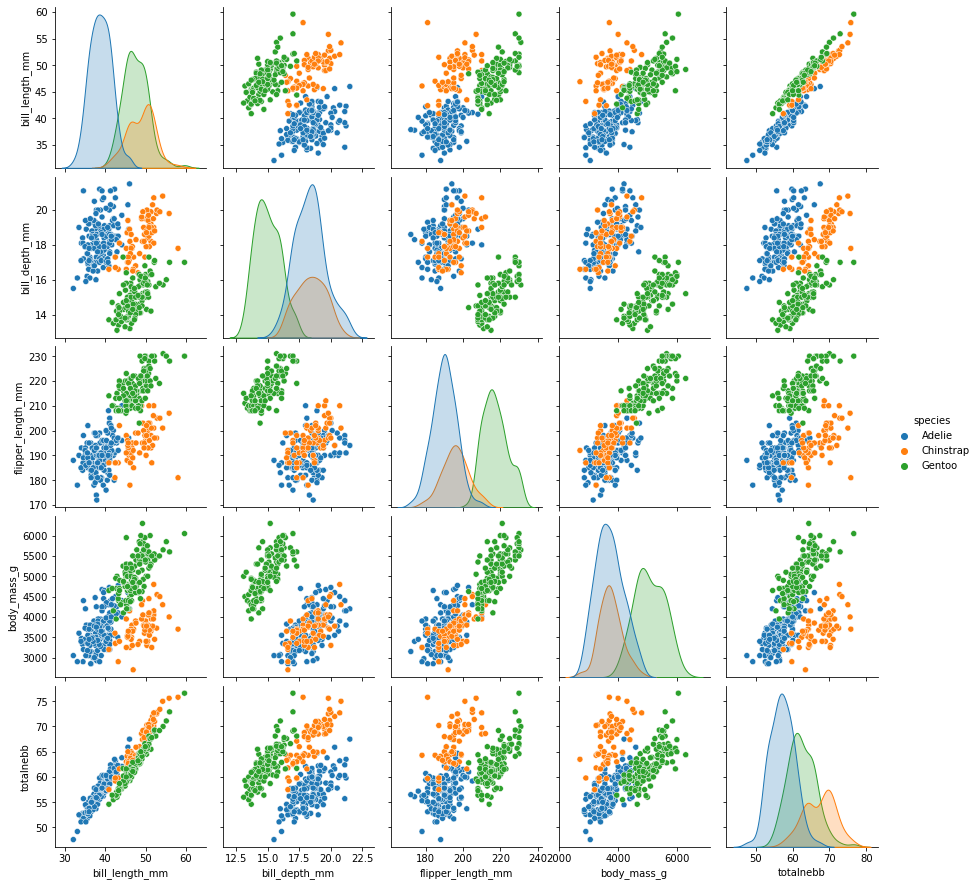

In [38]:
sns.pairplot(pingviner, hue = "species")

<AxesSubplot:>

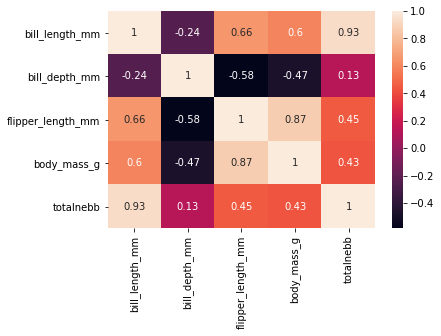

In [40]:
korrelasjon = pingviner.corr()
sns.heatmap(korrelasjon, annot=True)

## Maskinlæring

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
pingviner.dropna(inplace=True)

In [74]:
kriterier = pingviner[["body_mass_g", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
kategorier = pingviner["species"]

In [75]:
testandel = 0.20 # bruker 20 % av datasettet til å teste
ml_data = train_test_split(kriterier, kategorier, test_size=testandel, random_state=42)

treningskriterier = ml_data[0]
testkriterier = ml_data[1]
treningskategorier = ml_data[2]
testkategorier = ml_data[3]

In [76]:
modell = tree.DecisionTreeClassifier()
modell.fit(treningskriterier, treningskategorier)

DecisionTreeClassifier()

In [77]:
forutsigelser = modell.predict(testkriterier)
accuracy_score(testkategorier, forutsigelser)

0.9850746268656716

In [78]:
modell.predict([[2000, 40, 60, 500]])

array(['Adelie'], dtype=object)